# outliers_detect 패키지 검사

## 목차
### 1. iforest 

# iforest class 내의 매소드

## __init__ :초기 설정
- init 을 통해서 파라미터 설정(contamination rate 변수로 받음, 입력 안하면 default 값)

## iforest_index: 이상치 index 반환

- init 설정으로 모델 적합시키고->
   데이터 프레임을 받아서 outlier index 값을 list 형으로 반환
- 그런데 categorical 한 것들이 문제가 생겨서, 범주형 변수는 제외하는 df를 새로 만들어서 함

## iforest_score: 이상치 score 반환 

- 데이터 프레임을 받아서 outlier score값들을 ndarray형으로 반환
        -score의 range는 [-1,0] 
        -0에 가까울수록 거리가 짧고, anomaly로 감지될 가능성 大

## iforest_rate: 이상치 비율 반환
- float 형으로 전체 관측개체 수 중 outlier로 detect된 개체 수의 비율 반환

##  iforest_visaulize: 이상치 그래프
- index와 이상치 스코어의 관계를 꺾은선으로 나타냄
- 이상치로 판별난 점들을 동그라미로 덧대어 표현함

### 추가되어야 할 것들:
- 

### 의문인 것들:
- categorical 변수들은 어떡하나? 그냥 df에서 제외시켜야 하나?
- 근데 어떤 field를 선택하는 것도 이 패키지에 달려 있어야 하나? 아니면 그냥 선택된 dataframe이 들어오는 건가?


- if_outliers의 객체 x
- iforest_index 매서드를 써서 얻어낸 결과치 y:(이상치로 판별된 index)
- iforest_score 매서들 써서 얻어낸 관측 개체의 anomaly score의 array z
- iforest_visualize 매서드를 써서 얻어낸 그림 


일단 먼저 import 

In [1]:
import outliers_detect as od

In [2]:
dir(od)

['ABOD',
 'IsolationForest',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'abod_outliers',
 'if_outliers',
 'np',
 'pd',
 'plt',
 'sns']

그 다음에 data set 로드

## dataset에 적용시켜보기-1)

In [3]:
PATH='C:\\Users\\98gud\\Desktop\\pck\\dataset\\creditcard.csv'
df=od.pd.read_csv(PATH)


In [4]:
display(df.describe())
print(df.columns)
print(df.shape)

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.537294e-16  7.959909e-16  5.367590e-16  4.458112e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.453003e-15  1.699104e-15 -3.660161e-16 -1.206049e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
(284807, 31)


In [5]:
cols=list(df.columns)

In [6]:
#fig=od.plt.figure(figsize=(20,20))
#for i, col in enumerate(cols):
#    ax=fig.add_subplot(8,4,i+1)
#    ax.set_title(col +" dist",color='DarkRed')
#    od.sns.boxplot(x=df[col])
#    fig.tight_layout()  

In [7]:
x=od.if_outliers()

In [8]:
y=x.if_index(df)

In [9]:
print(y)

[51, 82, 83, 134, 140, 145, 146, 150, 164, 174, 190, 225, 290, 362, 370, 384, 401, 455, 460, 472, 529, 541, 601, 736, 841, 865, 952, 986, 1027, 1047, 1086, 1158, 1219, 1281, 1313, 1388, 1425, 1515, 1608, 1632, 1722, 1723, 1742, 1753, 1805, 1810, 1813, 1815, 1830, 1856, 1922, 2016, 2059, 2061, 2117, 2164, 2178, 2182, 2186, 2214, 2234, 2267, 2277, 2278, 2309, 2344, 2350, 2386, 2453, 2457, 2464, 2478, 2490, 2520, 2622, 2629, 2677, 2678, 2682, 2694, 2791, 2792, 2897, 2951, 2954, 2956, 2957, 2963, 3099, 3102, 3106, 3443, 3502, 3505, 3509, 3547, 3554, 3555, 3602, 3651, 3761, 3771, 3780, 3989, 4023, 4066, 4134, 4228, 4235, 4274, 4311, 4393, 4394, 4415, 4549, 4554, 4608, 4622, 4623, 4635, 4638, 4640, 4660, 4675, 4684, 4727, 4738, 4740, 4776, 4810, 4816, 4822, 4839, 4895, 4898, 4913, 4920, 4926, 4932, 4935, 4950, 4951, 5012, 5015, 5022, 5033, 5041, 5043, 5058, 5078, 5102, 5119, 5139, 5170, 5207, 5219, 5227, 5231, 5257, 5286, 5296, 5318, 5371, 5378, 5382, 5392, 5415, 5425, 5443, 5447, 5455, 5486

In [10]:
z=x.if_score(df)

In [11]:
print(type(z))

<class 'numpy.ndarray'>


In [12]:
print(z[0])

-0.3740661250189892


In [13]:
for i,value in enumerate(z):
    if i==1: break
    else: 
        print(value)
        print(type(value))

-0.3740661250189892
<class 'numpy.float64'>


In [14]:
z=od.pd.DataFrame(z,columns=['anomaly_score'])
z.describe()

anomaly_score
count  284807.000000
mean       -0.404707
std         0.042103
min        -0.777069
25%        -0.421019
50%        -0.395071
75%        -0.375903
max        -0.347085

In [15]:
#import matplotlib.pyplot as plt
#fig=plt.figure(figsize=(30,30))
#plt.plot(df.index,z)
#plt.scatter(y,z[[i for i in y]],edgecolor="k",color="red")
#plt.show()

In [16]:
print(x.if_rate(df))

0.03474282584346593


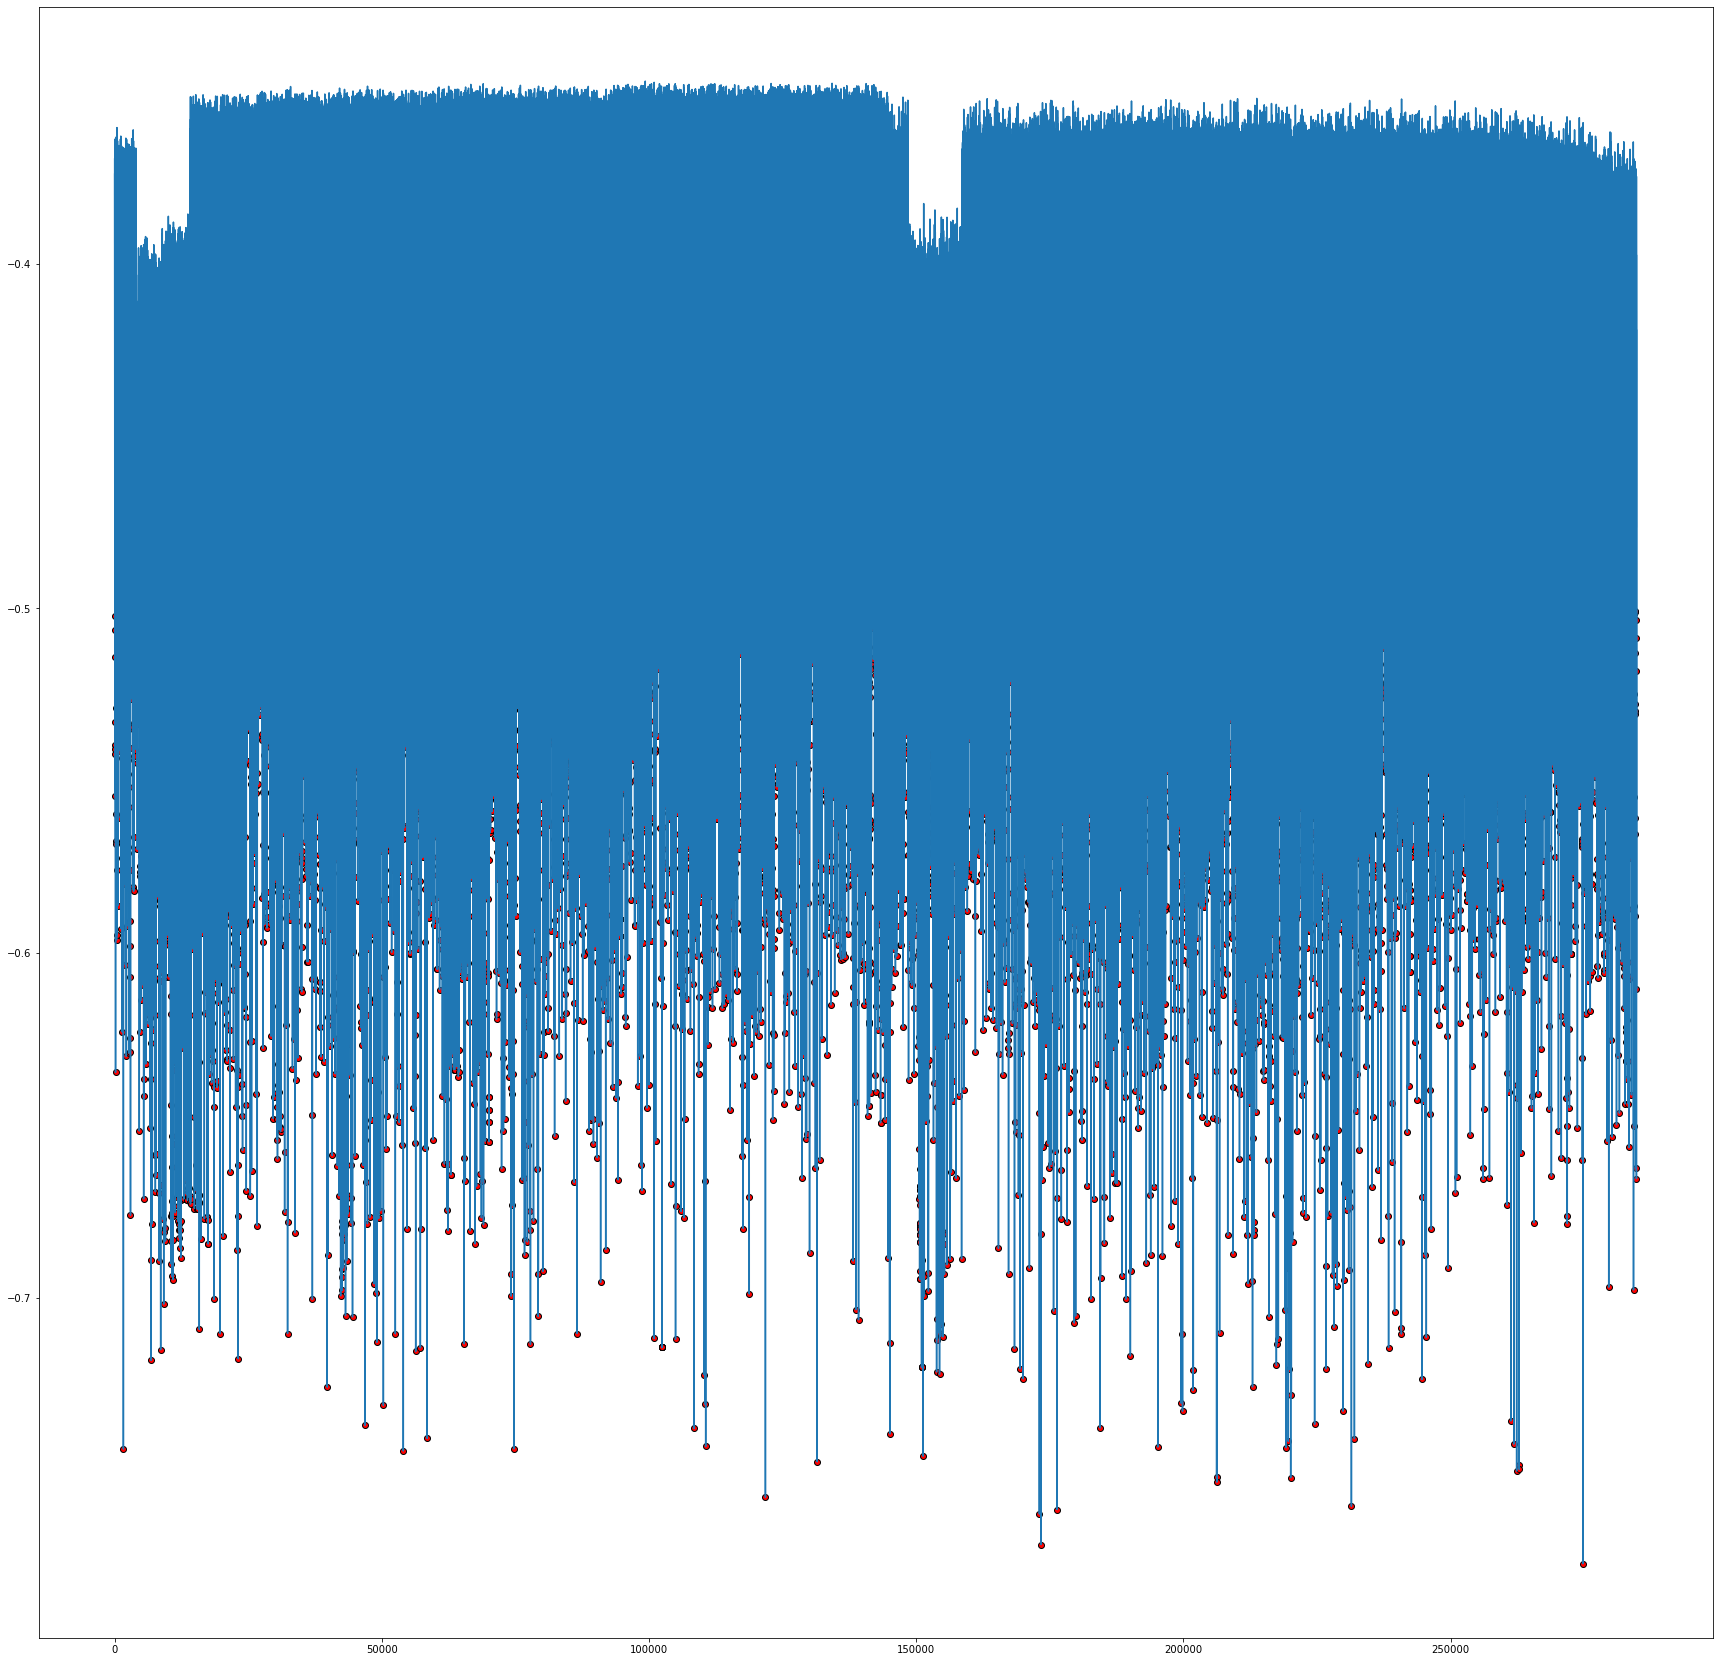

In [17]:
x.if_visualize(df)

## 다른 데이터 셋으로 해보기

### bankrupt 을 예측하는 것
- 이것역시 credit card 데이터 셋처럼 종속변수가 0 또는 1의 값을 가지는 카테고리컬
- 그 외에는 모두 float형


In [18]:
df2=od.pd.read_csv('C:\\Users\\98gud\\Desktop\\pck\\dataset\\data.csv')

In [19]:
display(df2.describe())
print("df2의 크기: ",df2.shape)
print("df2의 변수들: ", df2.columns)

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  ...  \
count                                   6819.000000  ...   
mean                                       0.303623  ...   
std                                        0.011163  ...   
min                                        0.000000  ...   
25%                                        0.303466  ...   
50%                                        0.303525  ...   
75%                                        0.303585  ...   
max                                        1.000000  ...   

        Net Income to Total Assets   Total assets to GNP price  \
count                  6819.000000                6.819000e+03   
mean                      0.807760                1.862942e+07   
std                       0.040332                3.764501e+08   
min

df2의 크기:  (6819, 96)
df2의 변수들:  Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth 

In [20]:
display(df2.head())

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

KeyError: 'Bankrupt?'

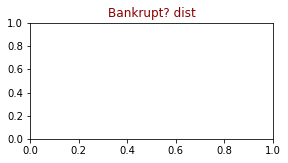

In [21]:
cols=list(df2.columns)
fig=od.plt.figure(figsize=(20,20))
for i, col in enumerate(cols):
    ax=fig.add_subplot(8,4,i+1)
    ax.set_title(col +" dist",color='DarkRed')
    od.sns.boxplot(x=df[col])
    fig.tight_layout()  
od.plt.savefig('boxplot.png')

In [22]:
x1=od.if_outliers()
y1=x1.if_index(df2)
z1=x1.if_score(df2)
print(x1.if_rate(df2))


0.012758468983721953


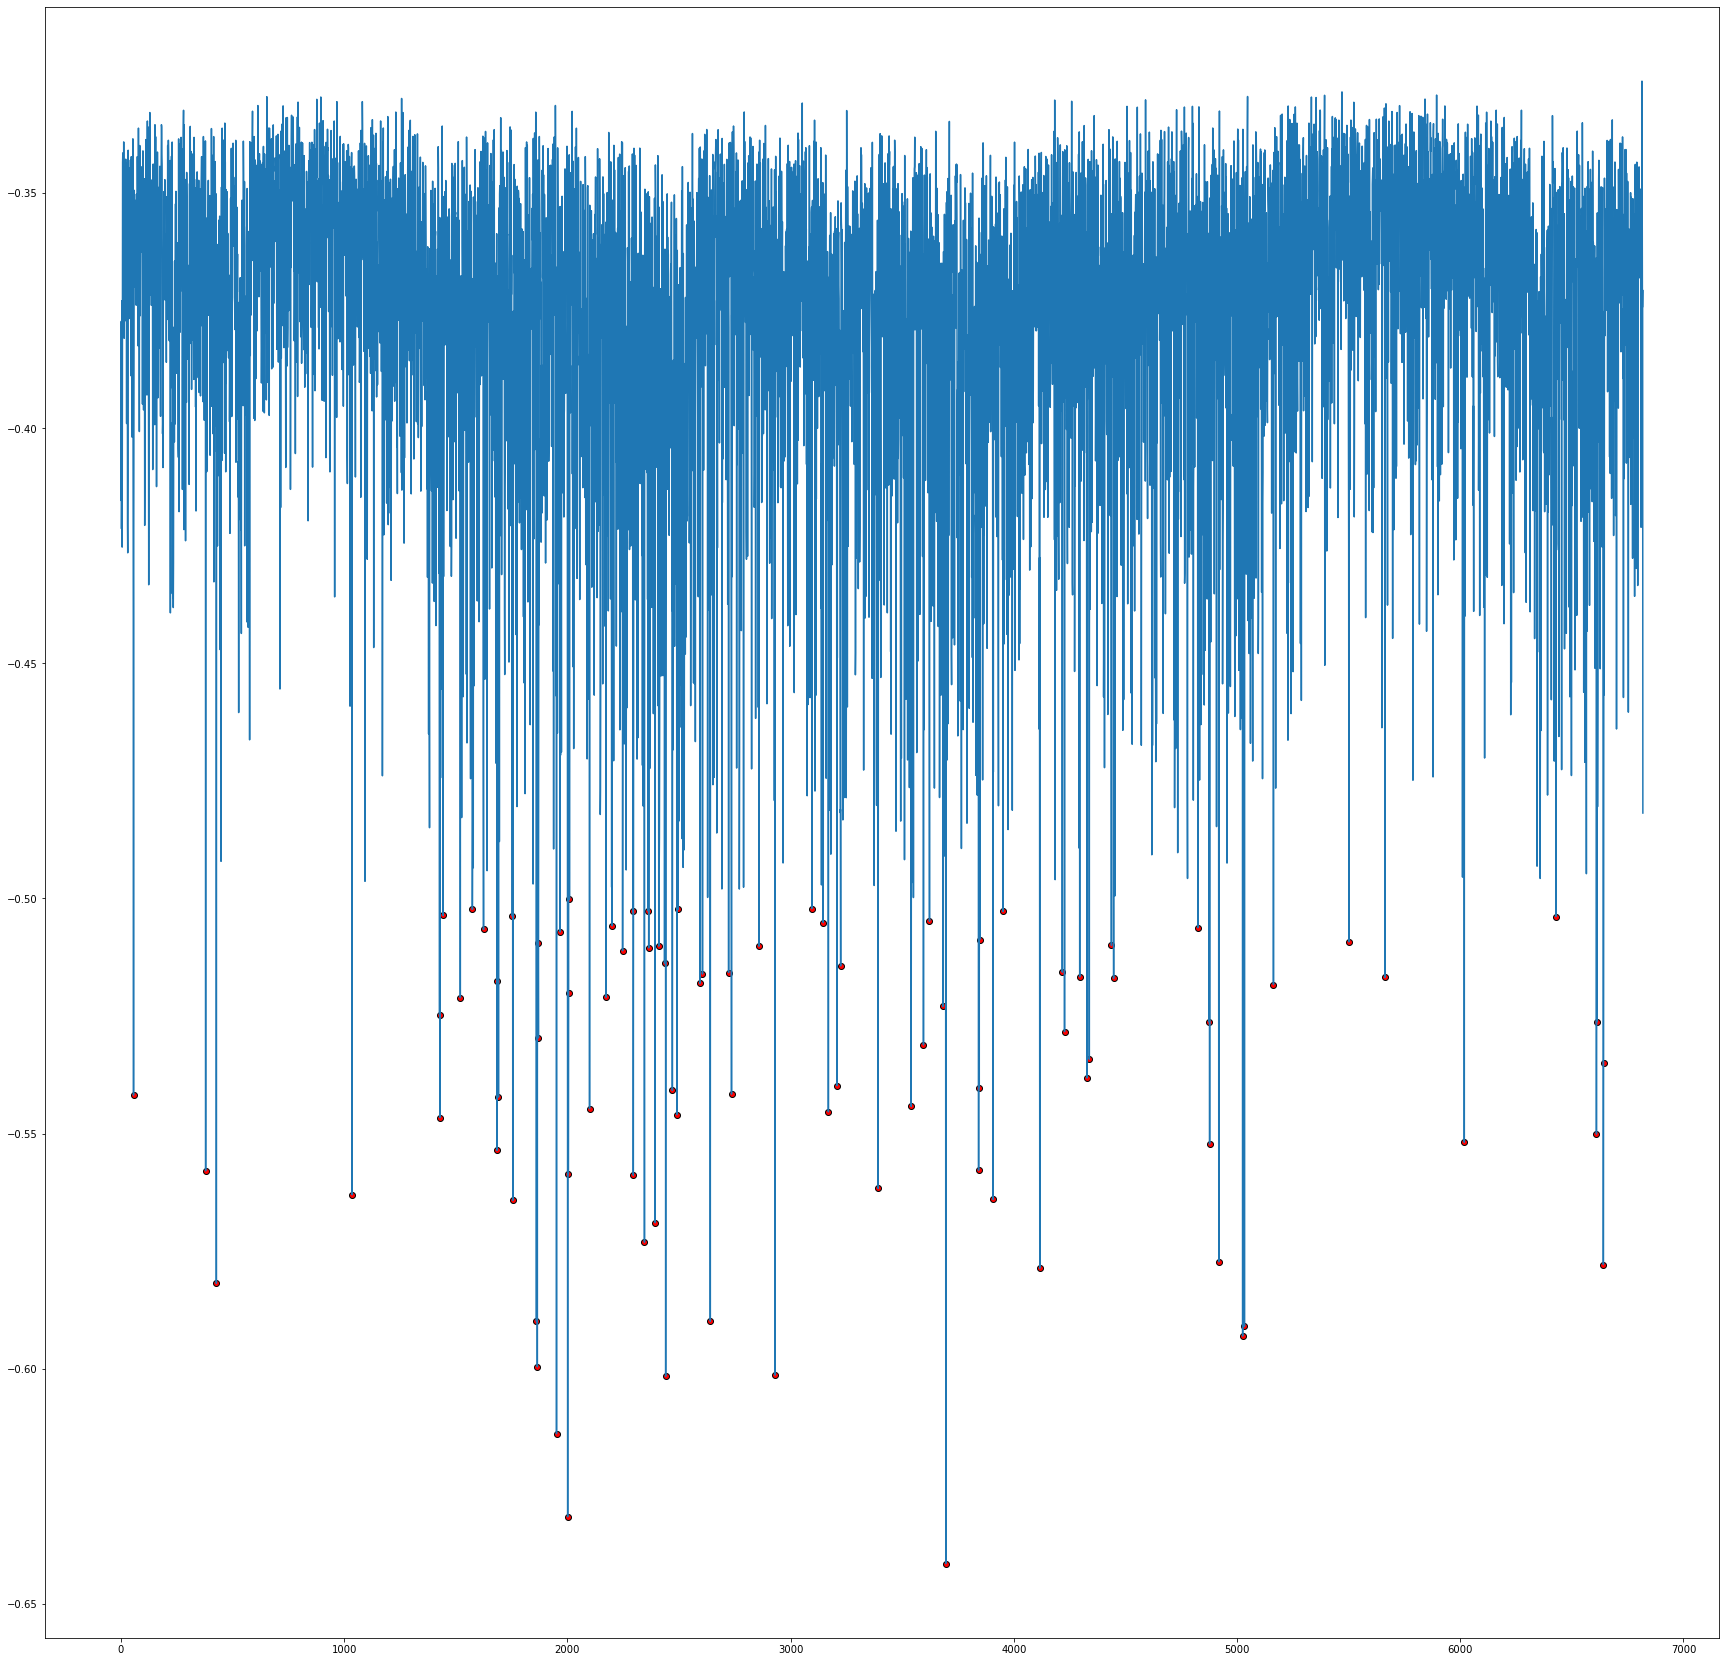

In [23]:
x1.if_visualize(df2)

## 또 다른 데이터 셋

In [73]:
df3=od.pd.read_csv('C:\\Users\\98gud\\Desktop\\pck\\dataset\\gasoline and diesel retail price.csv')

In [74]:
display(df3.describe())
print("df2의 크기: ",df3.shape)
print("df2의 변수들: ", df3.columns)

A1           A2           A3           R1           R2  \
count  1361.000000  1361.000000  1361.000000  1361.000000  1361.000000   
mean      2.285680     2.234511     2.396873     2.225170     2.178511   
std       0.859028     0.843815     0.883311     0.850143     0.835549   
min       0.949000     0.926000     1.039000     0.907000     0.885000   
25%       1.461000     1.433000     1.550000     1.421000     1.393000   
50%       2.326000     2.251000     2.458000     2.237000     2.175000   
75%       2.903000     2.825000     3.060000     2.828000     2.765000   
max       4.165000     4.102000     4.301000     4.114000     4.054000   

                R3           M1           M2           M3           P1  \
count  1361.000000  1361.000000  1361.000000  1361.000000  1361.000000   
mean      2.329126     2.382822     2.320970     2.508877     2.519840   
std       0.876739     0.882107     0.858521     0.908861     0.911055   
min       0.974000     1.008000     0.979000     1.112000     1.100000   
25%       1.489000     1.517000     1.482000     1.616000     1.607000   
50%       2.367000     2.481000     2.404000     2.627000     2.693000   
75%       2.976000     3.033000     2.930000     3.206000     3.209000   
max       4.247000     4.229000     4.153000     4.387000     4.344000   

                P2           P3           D1  
count  1361.000000  1361.000000  1361.000000  
mean      2.472096     2.609244     2.404699  
std       0.894472     0.925587     0.998646  
min       1.074000     1.191000     0.953000  
25%       1.573000     1.695000     1.418000  
50%       2.640000     2.769000     2.479000  
75%       3.127000     3.318000     3.070000  
max       4.283000     4.459000     4.764000

df2의 크기:  (1361, 14)
df2의 변수들:  Index(['Date', 'A1', 'A2', 'A3', 'R1', 'R2', 'R3', 'M1', 'M2', 'M3', 'P1',
       'P2', 'P3', 'D1'],
      dtype='object')


In [66]:
print(cols)

['A1', 'A2', 'A3', 'R1', 'R2', 'R3', 'M1', 'M2', 'M3', 'P1', 'P2', 'P3', 'D1']


In [67]:
display(df3.head())

Date     A1     A2     A3     R1     R2     R3     M1     M2     M3  \
0  01/02/1995  1.127  1.104  1.231  1.079  1.063  1.167  1.170  1.159  1.298   
1  01/09/1995  1.134  1.111  1.232  1.086  1.070  1.169  1.177  1.164  1.300   
2  01/16/1995  1.126  1.102  1.231  1.078  1.062  1.169  1.168  1.155  1.299   
3  01/23/1995  1.132  1.110  1.226  1.083  1.068  1.165  1.177  1.165  1.296   
4  01/30/1995  1.131  1.109  1.221  1.083  1.068  1.162  1.176  1.163  1.291   

      P1     P2     P3     D1  
0  1.272  1.250  1.386  1.104  
1  1.279  1.256  1.387  1.102  
2  1.271  1.249  1.385  1.100  
3  1.277  1.256  1.378  1.095  
4  1.275  1.255  1.370  1.090

KeyError: 'A1'

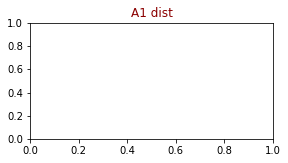

In [68]:
cols=list(df3.columns)
del cols[0]
fig=od.plt.figure(figsize=(20,20))
for i, col in enumerate(cols):
    ax=fig.add_subplot(8,4,i+1)
    ax.set_title(col +" dist",color='DarkRed')
    od.sns.boxplot(x=df[col])
    fig.tight_layout()  
od.plt.savefig('boxplot.png')

In [75]:
x2=od.if_outliers()
y2=x2.if_index(df3)
z2=x2.if_score(df3)
print(x2.if_rate(df3))


0.3438648052902278


In [76]:
print(type(z2))
print(z2)

<class 'numpy.ndarray'>
[-0.48718298 -0.48637641 -0.48828435 ... -0.46273547 -0.48201446
 -0.47524769]


In [77]:
print(y2)
print(len(y2))

[30, 31, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 178, 181, 182, 183, 184, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 264, 265, 266, 267, 284, 285, 286, 287, 288, 297, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 353, 354, 363, 364, 365, 377, 378, 413, 414, 415, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 450, 451, 452, 453, 454, 455, 456, 457, 458, 472, 473, 474, 475, 476, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 489, 490, 491, 493, 494, 495, 496, 498, 500, 501, 502, 503, 504, 505, 506, 507, 516, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 531, 557, 644, 645, 646, 647, 648, 649, 654, 671, 672, 673, 674, 678, 679, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 7

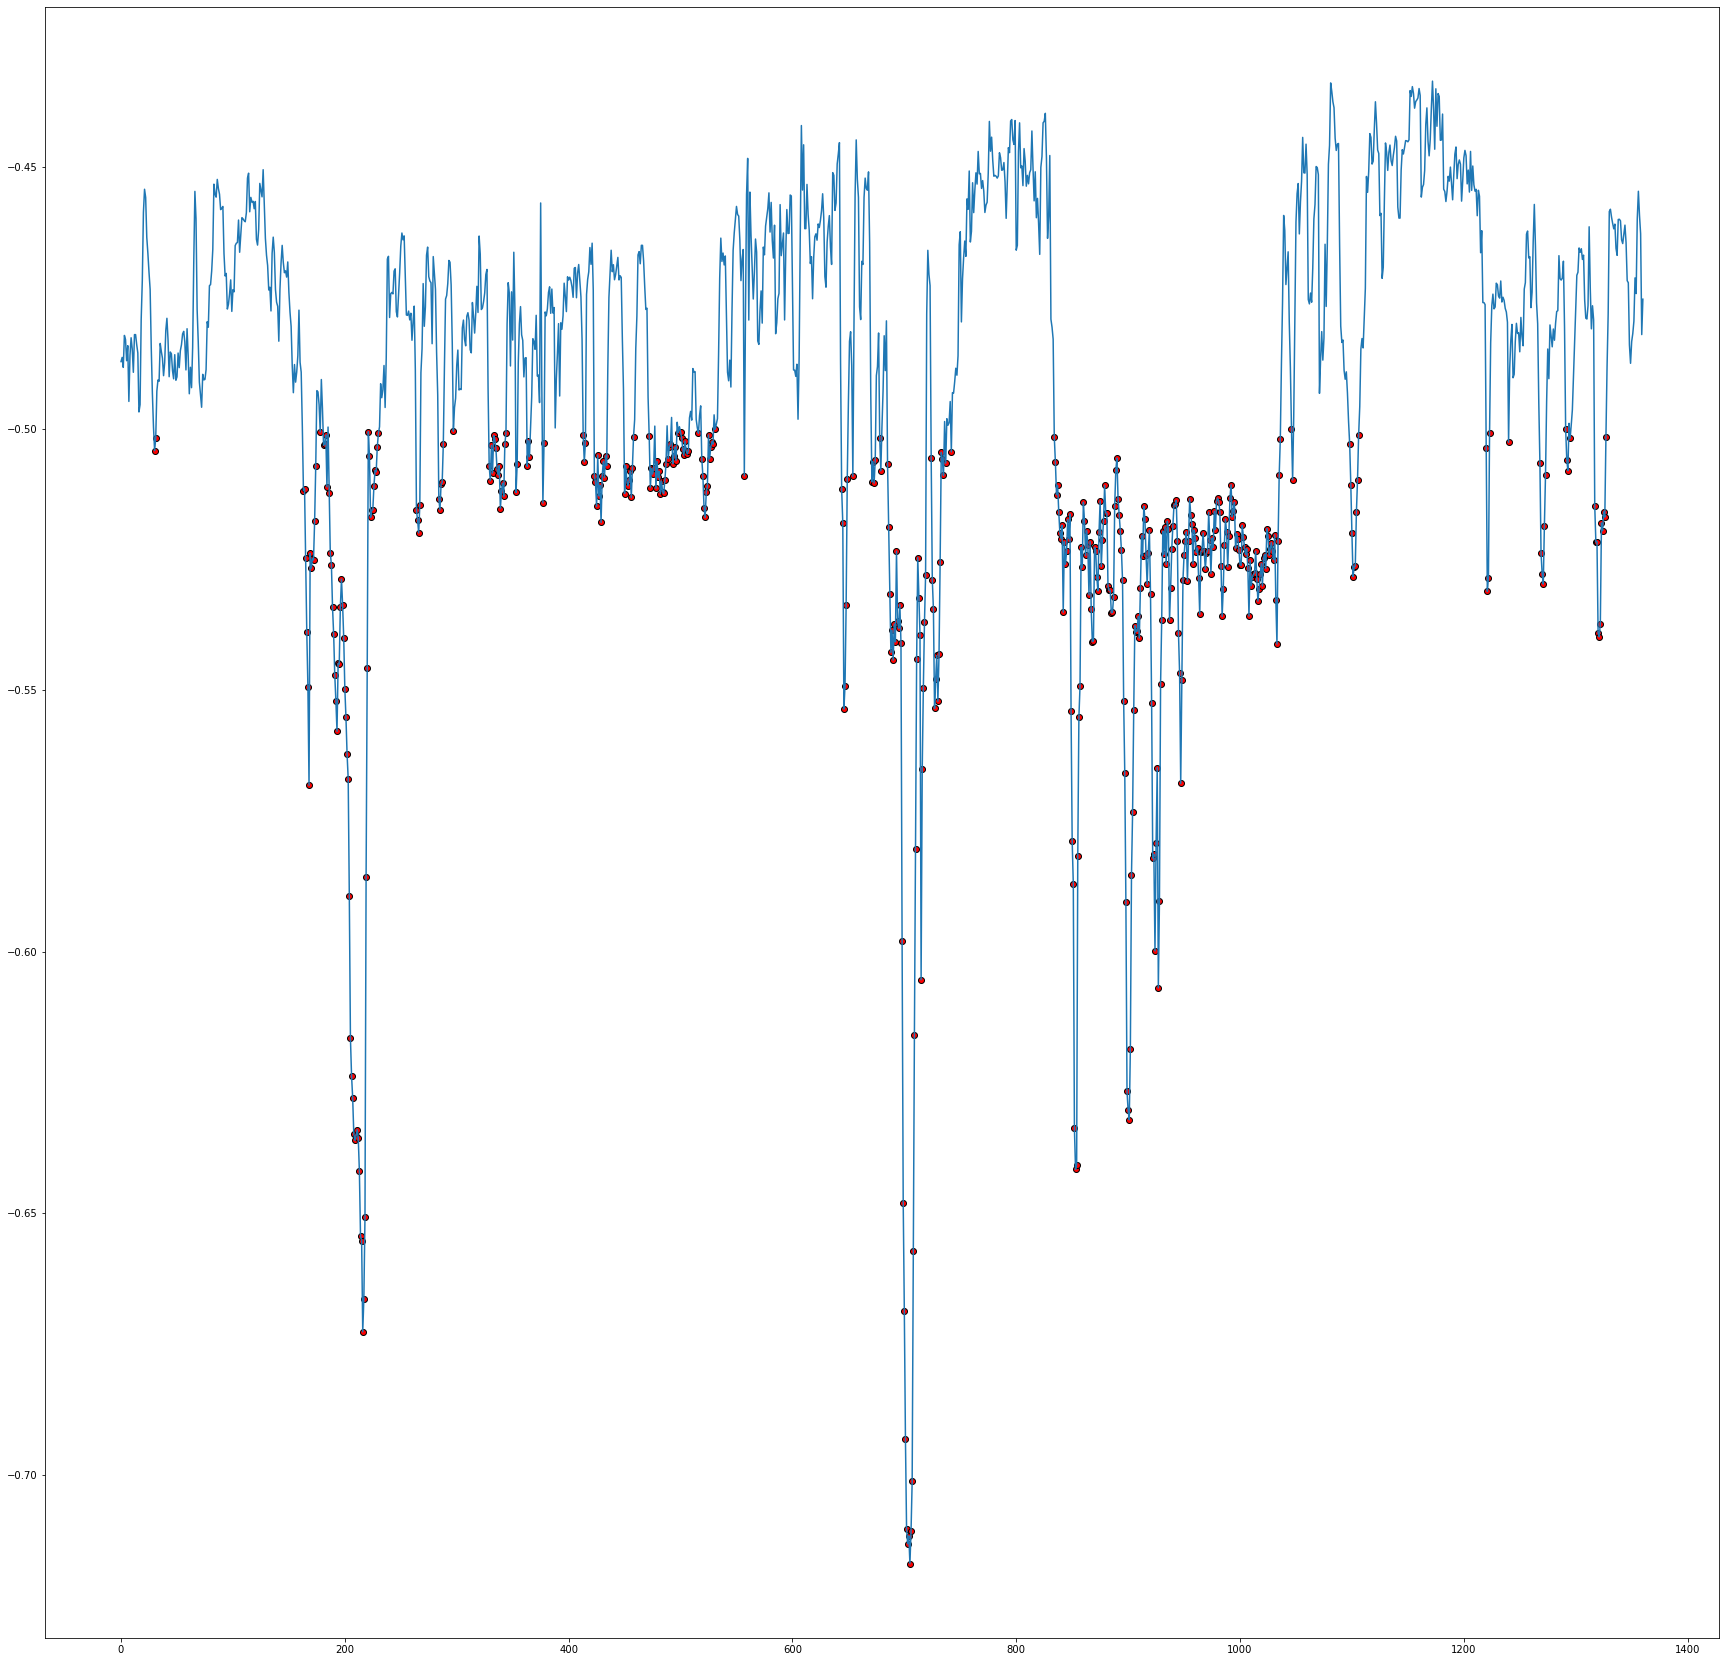

In [78]:
x2.if_visualize(df)

### 2. abod

### +) 다수결 방안에 대한 고민

In [80]:
a=1
b=2
c=3
def aa(*args):
    print(len(args))
    print(type(args))
    print(args)
    
aa(a,b,c)

3
<class 'tuple'>
(1, 2, 3)
